In [72]:
# 1. Import libraries / استيراد المكتبات
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # import matplotlib for data visualization
plt.style.use('seaborn-v0_8') # use modern color style

1. Choose a dataset from Kaggle

In [73]:
# We selected two related datasets from Kaggle to analyze the relationship between social media usage and mental health.

# Screen Time and App Usage Dataset — contains information about user activity, time spent on apps, and screen time in minutes.

# Mental Health and Technology Usage Dataset — includes user demographics, mental health status, and technology usage habits.
# We merged both datasets using the screen time (in hours) as a common key to create a new combined dataset called new_merged_dataset.csv.
# This unified dataset helps explore how the amount of time spent on social media is linked to users’ mental health and daily digital behavior.

In [74]:
screen = pd.read_csv("screen_time_app_usage_dataset.csv")
mental = pd.read_csv("mental_health_and_technology_usage_2024.csv")

screen["Screen_Time_Hours"] = (screen["screen_time_min"] / 60).round(1)

merged = pd.merge(screen, mental, on="Screen_Time_Hours", how="inner")
merged.to_csv("new_merged_dataset.csv", index=False)


2. Load the dataset into a pandas DataFrame.

In [75]:
#2. Load the dataset into a pandas DataFrame. 
df = pd.read_csv("new_merged_dataset.csv")
df

,user_id,date,app_name,category,screen_time_min,launches,interactions,is_productive,youtube_views,youtube_likes,...,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,Neutral,No
1,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,8.28,2.09,4.14,Fair,High,5.61,5.08,No,Neutral,Yes
2,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,1.20,1.67,1.57,Excellent,High,7.29,9.64,Yes,Positive,No
3,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,6.95,1.00,3.28,Fair,Low,6.85,4.66,Yes,Neutral,No
4,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,10.57,7.28,3.45,Fair,Low,5.65,9.81,No,Neutral,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,3.97,3.19,4.85,Fair,Low,8.98,5.34,Yes,Positive,Yes
2541,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,10.05,4.69,3.58,Fair,Low,6.76,0.37,No,Neutral,No
2542,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,1.81,5.54,3.52,Fair,Medium,6.59,3.66,No,Negative,No
2543,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,1.95,5.59,3.46,Good,Medium,6.03,6.14,No,Neutral,No


3. Perform data cleaning and preprocessing: 

In [76]:
# Shows all column names in the DataFrame
df.columns

Index(['user_id', 'date', 'app_name', 'category', 'screen_time_min',
       'launches', 'interactions', 'is_productive', 'youtube_views',
       'youtube_likes', 'youtube_comments', 'extra_col_11', 'extra_col_12',
       'extra_col_13', 'extra_col_14', 'extra_col_15', 'extra_col_16',
       'extra_col_17', 'extra_col_18', 'extra_col_19', 'extra_col_20',
       'extra_col_21', 'extra_col_22', 'extra_col_23', 'Screen_Time_Hours',
       'User_ID', 'Age', 'Gender', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Mental_Health_Status',
       'Stress_Level', 'Sleep_Hours', 'Physical_Activity_Hours',
       'Support_Systems_Access', 'Work_Environment_Impact',
       'Online_Support_Usage'],
      dtype='object')

In [77]:
# quick count of missing values per column
df.isnull().sum() 

user_id                        0
date                           0
app_name                       0
category                       0
screen_time_min                0
launches                       0
interactions                   0
is_productive                  0
youtube_views               2386
youtube_likes               2386
youtube_comments            2386
extra_col_11                   0
extra_col_12                   0
extra_col_13                   0
extra_col_14                   0
extra_col_15                   0
extra_col_16                   0
extra_col_17                   0
extra_col_18                   0
extra_col_19                   0
extra_col_20                   0
extra_col_21                   0
extra_col_22                   0
extra_col_23                   0
Screen_Time_Hours              0
User_ID                        0
Age                            0
Gender                         0
Technology_Usage_Hours         0
Social_Media_Usage_Hours       0
Gaming_Hou

In [78]:
# Drop empty columns
df.dropna(axis=1, how='all', inplace=True)
df

,user_id,date,app_name,category,screen_time_min,launches,interactions,is_productive,youtube_views,youtube_likes,...,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,Neutral,No
1,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,8.28,2.09,4.14,Fair,High,5.61,5.08,No,Neutral,Yes
2,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,1.20,1.67,1.57,Excellent,High,7.29,9.64,Yes,Positive,No
3,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,6.95,1.00,3.28,Fair,Low,6.85,4.66,Yes,Neutral,No
4,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,NaN,NaN,...,10.57,7.28,3.45,Fair,Low,5.65,9.81,No,Neutral,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,3.97,3.19,4.85,Fair,Low,8.98,5.34,Yes,Positive,Yes
2541,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,10.05,4.69,3.58,Fair,Low,6.76,0.37,No,Neutral,No
2542,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,1.81,5.54,3.52,Fair,Medium,6.59,3.66,No,Negative,No
2543,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,NaN,NaN,...,1.95,5.59,3.46,Good,Medium,6.03,6.14,No,Neutral,No


In [79]:
# Removes extra spaces from column names and text values  
# يحذف المسافات الزائدة من أسماء الأعمدة والقيم النصية
# Strip spaces
df.columns = df.columns.str.strip()
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].str.strip()

In [80]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [81]:
# quick count of missing values per column
df.isnull().sum()

user_id                        0
date                           0
app_name                       0
category                       0
screen_time_min                0
launches                       0
interactions                   0
is_productive                  0
youtube_views               2386
youtube_likes               2386
youtube_comments            2386
extra_col_11                   0
extra_col_12                   0
extra_col_13                   0
extra_col_14                   0
extra_col_15                   0
extra_col_16                   0
extra_col_17                   0
extra_col_18                   0
extra_col_19                   0
extra_col_20                   0
extra_col_21                   0
extra_col_22                   0
extra_col_23                   0
Screen_Time_Hours              0
User_ID                        0
Age                            0
Gender                         0
Technology_Usage_Hours         0
Social_Media_Usage_Hours       0
Gaming_Hou

In [82]:
# # Fill missing values using mean for numeric and mode for text columns
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].fillna(df[c].mode()[0])
    else:
        df[c] = df[c].fillna(df[c].mean())

In [83]:
df.isnull().sum()  # if there is any missing values per column?

user_id                     0
date                        0
app_name                    0
category                    0
screen_time_min             0
launches                    0
interactions                0
is_productive               0
youtube_views               0
youtube_likes               0
youtube_comments            0
extra_col_11                0
extra_col_12                0
extra_col_13                0
extra_col_14                0
extra_col_15                0
extra_col_16                0
extra_col_17                0
extra_col_18                0
extra_col_19                0
extra_col_20                0
extra_col_21                0
extra_col_22                0
extra_col_23                0
Screen_Time_Hours           0
User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hour

In [84]:
# Convert all column names to lowercase for consistent formatting
df.columns = df.columns.str.lower()
df

,user_id,date,app_name,category,screen_time_min,launches,interactions,is_productive,youtube_views,youtube_likes,...,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage
0,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,Neutral,No
1,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,8.28,2.09,4.14,Fair,High,5.61,5.08,No,Neutral,Yes
2,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,1.20,1.67,1.57,Excellent,High,7.29,9.64,Yes,Positive,No
3,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,6.95,1.00,3.28,Fair,Low,6.85,4.66,Yes,Neutral,No
4,1064,2024-01-01 03:38:28.369456485,Chrome,Utilities,85.15,2,5,False,232223.415094,12724.830189,...,10.57,7.28,3.45,Fair,Low,5.65,9.81,No,Neutral,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,232223.415094,12724.830189,...,3.97,3.19,4.85,Fair,Low,8.98,5.34,Yes,Positive,Yes
2541,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,232223.415094,12724.830189,...,10.05,4.69,3.58,Fair,Low,6.76,0.37,No,Neutral,No
2542,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,232223.415094,12724.830189,...,1.81,5.54,3.52,Fair,Medium,6.59,3.66,No,Negative,No
2543,1038,2024-03-31 23:16:18.326108703,WhatsApp,Social,149.72,3,5,False,232223.415094,12724.830189,...,1.95,5.59,3.46,Good,Medium,6.03,6.14,No,Neutral,No


In [85]:
# Check data types of all columns to ensure correct formats before analysis
df.dtypes

user_id                       int64
date                         object
app_name                     object
category                     object
screen_time_min             float64
launches                      int64
interactions                  int64
is_productive                  bool
youtube_views               float64
youtube_likes               float64
youtube_comments            float64
extra_col_11                float64
extra_col_12                float64
extra_col_13                float64
extra_col_14                float64
extra_col_15                float64
extra_col_16                float64
extra_col_17                float64
extra_col_18                float64
extra_col_19                float64
extra_col_20                float64
extra_col_21                float64
extra_col_22                float64
extra_col_23                float64
screen_time_hours           float64
user_id                      object
age                           int64
gender                      

In [86]:
# Convert 'date' to datetime and 'age' to numeric type to ensure accurate analysis
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')

# Save the updated DataFrame back to CSV file
df.to_csv("new_merged_dataset.csv", index=False)

In [87]:
# Display dataset summary after cleaning to verify data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   2545 non-null   int64         
 1   date                      2545 non-null   datetime64[ns]
 2   app_name                  2545 non-null   object        
 3   category                  2545 non-null   object        
 4   screen_time_min           2545 non-null   float64       
 5   launches                  2545 non-null   int64         
 6   interactions              2545 non-null   int64         
 7   is_productive             2545 non-null   bool          
 8   youtube_views             2545 non-null   float64       
 9   youtube_likes             2545 non-null   float64       
 10  youtube_comments          2545 non-null   float64       
 11  extra_col_11              2545 non-null   float64       
 12  extra_col_12        

In [88]:
#Check for missing values
df.isnull().sum()

user_id                     0
date                        0
app_name                    0
category                    0
screen_time_min             0
launches                    0
interactions                0
is_productive               0
youtube_views               0
youtube_likes               0
youtube_comments            0
extra_col_11                0
extra_col_12                0
extra_col_13                0
extra_col_14                0
extra_col_15                0
extra_col_16                0
extra_col_17                0
extra_col_18                0
extra_col_19                0
extra_col_20                0
extra_col_21                0
extra_col_22                0
extra_col_23                0
screen_time_hours           0
user_id                     0
age                         0
gender                      0
technology_usage_hours      0
social_media_usage_hours    0
gaming_hours                0
mental_health_status        0
stress_level                0
sleep_hour

In [89]:
# Drop unnecessary or extra columns from the dataset
df.drop(columns=[
    'extra_col_11','extra_col_12','extra_col_13','extra_col_14',
    'extra_col_15','extra_col_16','extra_col_17','extra_col_18',
    'extra_col_19','extra_col_20','extra_col_21','extra_col_22',
    'extra_col_23','user_id','youtube_views','youtube_likes','youtube_comments'
], inplace=True, errors='ignore')

# Save the cleaned dataset back to CSV file
df.to_csv("new_merged_dataset.csv", index=False)
print("Unnecessary columns removed and file saved successfully!")

Unnecessary columns removed and file saved successfully!


In [90]:
df.columns

Index(['date', 'app_name', 'category', 'screen_time_min', 'launches',
       'interactions', 'is_productive', 'screen_time_hours', 'age', 'gender',
       'technology_usage_hours', 'social_media_usage_hours', 'gaming_hours',
       'mental_health_status', 'stress_level', 'sleep_hours',
       'physical_activity_hours', 'support_systems_access',
       'work_environment_impact', 'online_support_usage'],
      dtype='object')

In [91]:
df.shape

(2545, 20)

In [92]:
# Select a random sample of 1000 rows to simplify analysis and reduce dataset size
df = df.sample(n=1000, random_state=42)

# Save back to the same file (overwrite the original)
df.to_csv("new_merged_dataset.csv", index=False)

print("Dataset reduced to 1000 rows and saved successfully!")

Dataset reduced to 1000 rows and saved successfully!


In [93]:
# Display dataset shape after cleaning to confirm final number of rows and columns
print("Shape after cleaning:", df.shape)

Shape after cleaning: (1000, 20)


4. Perform data analysis using pandas:

In [94]:
# Show the first 5 rows of the dataset to preview data after cleaning
df.head()  

,date,app_name,category,screen_time_min,launches,interactions,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage
56,2024-01-04 22:40:17.605868622,Slack,Productivity,61.13,1,3,True,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,Negative,No
610,2024-01-24 16:01:45.635211737,Instagram,Social,74.35,1,2,False,1.2,59,Male,11.09,6.96,4.17,Poor,Medium,7.10,1.29,Yes,Negative,No
1662,2024-03-04 03:28:23.367789263,Notion,Productivity,112.84,1,5,True,1.9,27,Other,4.77,7.20,3.25,Fair,Medium,6.57,5.77,No,Positive,No
1010,2024-02-06 12:04:33.691230410,WhatsApp,Social,61.69,5,6,False,1.0,47,Male,2.41,4.09,4.39,Poor,Medium,6.21,0.33,Yes,Positive,No
2416,2024-03-27 18:46:27.329109703,Google Docs,Productivity,106.11,0,5,True,1.8,57,Other,3.84,1.28,1.78,Good,High,5.39,4.45,Yes,Neutral,No


In [95]:
# Show the first 10 rows of the dataset to review a larger data sample
df.head(10)

,date,app_name,category,screen_time_min,launches,interactions,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage
56,2024-01-04 22:40:17.605868622,Slack,Productivity,61.13,1,3,True,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,Negative,No
610,2024-01-24 16:01:45.635211737,Instagram,Social,74.35,1,2,False,1.2,59,Male,11.09,6.96,4.17,Poor,Medium,7.10,1.29,Yes,Negative,No
1662,2024-03-04 03:28:23.367789263,Notion,Productivity,112.84,1,5,True,1.9,27,Other,4.77,7.20,3.25,Fair,Medium,6.57,5.77,No,Positive,No
1010,2024-02-06 12:04:33.691230410,WhatsApp,Social,61.69,5,6,False,1.0,47,Male,2.41,4.09,4.39,Poor,Medium,6.21,0.33,Yes,Positive,No
2416,2024-03-27 18:46:27.329109703,Google Docs,Productivity,106.11,0,5,True,1.8,57,Other,3.84,1.28,1.78,Good,High,5.39,4.45,Yes,Neutral,No
859,2024-02-01 02:26:55.738579526,Google Docs,Productivity,90.26,1,4,True,1.5,48,Female,2.88,5.71,2.52,Fair,Medium,8.36,2.74,No,Negative,No
1255,2024-02-17 00:02:52.857619206,Snapchat,Social,108.19,1,1,False,1.8,41,Male,1.68,6.02,0.39,Fair,High,5.08,6.39,Yes,Positive,No
1381,2024-02-21 13:17:03.941313771,Gmail,Utilities,60.27,2,7,False,1.0,49,Other,1.74,6.10,4.81,Good,Medium,4.06,2.55,No,Negative,Yes
194,2024-01-08 22:04:16.885628542,YouTube,Entertainment,71.70,1,4,False,1.2,38,Female,3.06,0.82,2.76,Excellent,Low,4.41,8.60,No,Neutral,Yes
387,2024-01-15 20:50:20.206735578,Twitter,Social,86.34,5,5,False,1.4,65,Other,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,Neutral,No


In [96]:
# Show the last 5 rows of the dataset to review the end of the table
df.tail()  

,date,app_name,category,screen_time_min,launches,interactions,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage
2501,2024-03-30 18:52:13.044348116,Twitter,Social,74.26,2,6,False,1.2,59,Female,9.07,4.05,1.86,Excellent,Low,6.16,8.90,No,Negative,Yes
483,2024-01-19 06:24:07.682560853,Microsoft Teams,Productivity,66.59,1,2,True,1.1,39,Female,8.21,3.61,2.14,Good,Medium,7.90,6.11,No,Neutral,Yes
2427,2024-03-27 20:57:32.350783595,Twitch,Entertainment,73.40,1,6,False,1.2,31,Male,9.46,7.86,3.69,Poor,High,5.85,2.87,No,Positive,No
915,2024-02-03 14:09:52.997665888,Netflix,Entertainment,58.67,3,5,False,1.0,49,Other,1.74,6.10,4.81,Good,Medium,4.06,2.55,No,Negative,Yes
1517,2024-02-27 05:27:56.958986329,Chrome,Utilities,185.65,1,4,False,3.1,54,Male,3.07,6.47,0.82,Excellent,Medium,6.27,7.84,No,Neutral,Yes


In [97]:
# Show the total number of rows and columns in the dataset
df.shape

(1000, 20)

In [98]:
# List all column names in the dataset
df.columns 

Index(['date', 'app_name', 'category', 'screen_time_min', 'launches',
       'interactions', 'is_productive', 'screen_time_hours', 'age', 'gender',
       'technology_usage_hours', 'social_media_usage_hours', 'gaming_hours',
       'mental_health_status', 'stress_level', 'sleep_hours',
       'physical_activity_hours', 'support_systems_access',
       'work_environment_impact', 'online_support_usage'],
      dtype='object')

In [99]:
# Display detailed info about columns, data types, non-null counts, and memory usage
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 56 to 1517
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      1000 non-null   datetime64[ns]
 1   app_name                  1000 non-null   object        
 2   category                  1000 non-null   object        
 3   screen_time_min           1000 non-null   float64       
 4   launches                  1000 non-null   int64         
 5   interactions              1000 non-null   int64         
 6   is_productive             1000 non-null   bool          
 7   screen_time_hours         1000 non-null   float64       
 8   age                       1000 non-null   Int64         
 9   gender                    1000 non-null   object        
 10  technology_usage_hours    1000 non-null   float64       
 11  social_media_usage_hours  1000 non-null   float64       
 12  gaming_hours            

In [100]:
# show basic statistics for numeric columns (mean, std, min, max, etc.)
df.describe()

,date,screen_time_min,launches,interactions,screen_time_hours,age,technology_usage_hours,social_media_usage_hours,gaming_hours,sleep_hours,physical_activity_hours
count,1000,1000.000000,1000.000,1000.000000,1000.00000,1000.0,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2024-02-16 17:55:32.445214976,93.594860,2.018,5.084000,1.56200,40.148,5.557620,4.04206,2.714090,6.206590,4.805520
min,2024-01-01 05:05:51.717239079,57.060000,0.000,0.000000,1.00000,18.0,1.110000,0.21000,0.100000,4.040000,0.100000
25%,2024-01-23 21:38:28.369456640,71.260000,1.000,3.000000,1.20000,29.0,2.410000,2.21000,1.610000,5.070000,2.550000
50%,2024-02-17 06:36:07.922640896,82.340000,2.000,5.000000,1.40000,39.0,4.960000,4.05000,2.760000,6.210000,4.905000
75%,2024-03-10 11:40:33.211070464,108.230000,3.000,6.000000,1.80000,50.0,8.310000,5.71000,3.912500,7.150000,6.980000
max,2024-03-31 23:16:18.326108703,218.390000,7.000,13.000000,3.60000,65.0,11.960000,7.92000,4.990000,8.980000,9.860000
std,NaN,32.857842,1.471,2.114572,0.54576,13.188936,3.304239,2.17088,1.382618,1.398072,2.712112


In [101]:
# Count unique values in categorical columns
df.nunique()

date                        393
app_name                     20
category                      4
screen_time_min             386
launches                      8
interactions                 13
is_productive                 2
screen_time_hours            26
age                          47
gender                        3
technology_usage_hours      141
social_media_usage_hours    140
gaming_hours                125
mental_health_status          4
stress_level                  3
sleep_hours                 132
physical_activity_hours     142
support_systems_access        2
work_environment_impact       3
online_support_usage          2
dtype: int64

In [138]:
# Find averages of numeric columns
df.mean(numeric_only=True)

screen_time_min              93.59486
launches                        2.018
interactions                    5.084
is_productive                   0.239
screen_time_hours               1.562
age                            40.148
technology_usage_hours        5.55762
social_media_usage_hours      4.04206
gaming_hours                  2.71409
sleep_hours                   6.20659
physical_activity_hours       4.80552
heavy_user                      0.173
total_usage                 165.90574
stress_level_num                1.989
digital_wellbeing_index      0.784892
dtype: Float64

In [136]:
# Find maximums of numeric columns
df.max(numeric_only=True)

screen_time_min             218.39
launches                         7
interactions                    13
is_productive                 True
screen_time_hours              3.6
age                             65
technology_usage_hours       11.96
social_media_usage_hours      7.92
gaming_hours                  4.99
sleep_hours                   8.98
physical_activity_hours       9.86
heavy_user                       1
total_usage                 313.15
stress_level_num                 3
digital_wellbeing_index       3.92
dtype: object

In [137]:
# Find minimums of numeric columns
df.min(numeric_only=True)

screen_time_min             57.06
launches                        0
interactions                    0
is_productive               False
screen_time_hours             1.0
age                            18
technology_usage_hours       1.11
social_media_usage_hours     0.21
gaming_hours                  0.1
sleep_hours                  4.04
physical_activity_hours       0.1
heavy_user                      0
total_usage                 101.9
stress_level_num                1
digital_wellbeing_index     -1.36
dtype: object

In [103]:
# Filter rows using conditions
df[df['category'].isin(['Social', 'Games'])] # only Social or Games category

,date,app_name,category,screen_time_min,launches,interactions,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage
610,2024-01-24 16:01:45.635211737,Instagram,Social,74.35,1,2,False,1.2,59,Male,11.09,6.96,4.17,Poor,Medium,7.10,1.29,Yes,Negative,No
1010,2024-02-06 12:04:33.691230410,WhatsApp,Social,61.69,5,6,False,1.0,47,Male,2.41,4.09,4.39,Poor,Medium,6.21,0.33,Yes,Positive,No
1255,2024-02-17 00:02:52.857619206,Snapchat,Social,108.19,1,1,False,1.8,41,Male,1.68,6.02,0.39,Fair,High,5.08,6.39,Yes,Positive,No
387,2024-01-15 20:50:20.206735578,Twitter,Social,86.34,5,5,False,1.4,65,Other,7.58,7.92,1.62,Fair,Low,5.20,7.24,No,Neutral,No
2058,2024-03-15 16:12:19.446482161,Instagram,Social,209.48,3,5,False,3.5,27,Other,7.17,3.93,3.24,Good,Medium,7.75,3.15,Yes,Positive,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2024-01-09 15:32:57.059019673,Twitter,Social,63.15,0,4,False,1.1,55,Other,3.28,2.90,0.42,Good,High,6.41,1.33,No,Positive,No
2522,2024-03-31 02:52:51.457152384,Instagram,Social,71.74,3,6,False,1.2,29,Other,2.08,4.68,4.14,Poor,Medium,4.36,2.23,Yes,Neutral,No
1253,2024-02-17 00:02:52.857619206,Snapchat,Social,108.19,1,1,False,1.8,41,Male,1.93,1.60,1.54,Fair,Low,5.59,1.91,Yes,Neutral,Yes
1578,2024-02-29 04:48:05.761920640,Twitter,Social,60.29,1,6,False,1.0,49,Other,1.74,6.10,4.81,Good,Medium,4.06,2.55,No,Negative,Yes


In [104]:
# Filter rows using conditions
df[df['screen_time_min'] > 120]              # users with more than 2h screen time

,date,app_name,category,screen_time_min,launches,interactions,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage
1723,2024-03-06 02:48:32.170723575,Netflix,Entertainment,176.98,3,3,False,2.9,41,Male,4.68,5.26,0.84,Excellent,Medium,4.84,2.33,No,Positive,No
2058,2024-03-15 16:12:19.446482161,Instagram,Social,209.48,3,5,False,3.5,27,Other,7.17,3.93,3.24,Good,Medium,7.75,3.15,Yes,Positive,No
251,2024-01-10 11:12:42.254084694,Instagram,Social,134.82,1,5,False,2.2,38,Female,10.62,3.92,0.55,Poor,Medium,6.42,9.80,No,Negative,Yes
1621,2024-03-02 02:40:51.217072358,Instagram,Social,134.14,1,5,False,2.2,18,Male,3.26,5.59,4.21,Poor,Low,5.21,1.08,No,Negative,No
888,2024-02-03 01:03:22.867622541,Weather,Utilities,120.06,3,2,False,2.0,48,Other,1.12,6.56,4.44,Good,Low,6.62,1.45,No,Negative,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,2024-03-15 16:12:19.446482161,Instagram,Social,209.48,3,5,False,3.5,41,Male,7.59,5.10,0.44,Poor,Medium,5.29,4.50,No,Negative,Yes
976,2024-02-05 21:30:40.213404468,Microsoft Teams,Productivity,122.04,2,4,True,2.0,50,Female,7.60,1.71,4.10,Fair,Low,7.09,3.61,Yes,Negative,No
2234,2024-03-21 02:33:39.073024342,Snapchat,Social,138.82,1,7,False,2.3,58,Other,11.83,6.58,3.41,Poor,Medium,6.37,7.74,No,Positive,Yes
1163,2024-02-12 07:53:55.078359453,Notion,Productivity,215.94,3,6,True,3.6,45,Other,9.17,3.61,2.14,Fair,High,5.07,1.87,No,Neutral,No


In [105]:
# Filter rows using conditions
df[df['age'].between(18, 25)]                # users aged between 18–25

,date,app_name,category,screen_time_min,launches,interactions,is_productive,screen_time_hours,age,gender,technology_usage_hours,social_media_usage_hours,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage
56,2024-01-04 22:40:17.605868622,Slack,Productivity,61.13,1,3,True,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,Negative,No
2011,2024-03-14 05:58:40.773591197,Facebook,Social,76.55,1,8,False,1.3,19,Other,4.55,1.60,0.77,Good,High,6.82,5.39,Yes,Negative,No
1382,2024-02-21 15:28:08.962987662,Chrome,Utilities,57.06,1,5,False,1.0,22,Male,8.31,0.93,1.51,Fair,Low,4.66,4.93,No,Negative,No
1621,2024-03-02 02:40:51.217072358,Instagram,Social,134.14,1,5,False,2.2,18,Male,3.26,5.59,4.21,Poor,Low,5.21,1.08,No,Negative,No
1563,2024-02-28 13:30:30.610203401,Slack,Productivity,120.59,1,3,True,2.0,22,Female,9.81,4.95,2.31,Good,High,8.31,4.99,Yes,Negative,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2024-01-05 17:36:21.127042347,WhatsApp,Social,90.65,1,2,False,1.5,25,Male,4.86,1.70,0.76,Fair,Medium,6.72,5.26,No,Negative,Yes
380,2024-01-15 08:27:31.750583528,Weather,Utilities,78.64,4,6,False,1.3,22,Other,1.55,2.07,4.21,Poor,High,7.06,6.25,Yes,Negative,No
1420,2024-02-23 08:15:02.700900300,Twitch,Entertainment,71.17,2,10,False,1.2,19,Male,1.65,7.62,3.60,Excellent,High,7.31,4.49,No,Neutral,Yes
2171,2024-03-19 17:47:23.747915972,Weather,Utilities,113.89,1,7,False,1.9,25,Other,4.50,2.76,1.43,Fair,Low,4.50,5.83,Yes,Positive,Yes


In [106]:
# Group data by category and calculate average screen time
df.groupby('category')['screen_time_min'].mean()

category
Entertainment    92.752791
Productivity     98.364728
Social           94.635714
Utilities        88.347478
Name: screen_time_min, dtype: float64

In [107]:
# Correlation between numeric columns
df.corr(numeric_only=True)

,screen_time_min,launches,interactions,is_productive,screen_time_hours,age,technology_usage_hours,social_media_usage_hours,gaming_hours,sleep_hours,physical_activity_hours
screen_time_min,1.000000,-0.039251,0.037300,0.081394,0.998749,-0.048398,0.109289,-0.023196,-0.157587,0.100315,0.042898
launches,-0.039251,1.000000,0.008524,0.050553,-0.043037,-0.008599,0.016073,0.082417,0.055550,-0.046916,0.022700
interactions,0.037300,0.008524,1.000000,0.002135,0.039979,-0.011070,0.036035,-0.013893,-0.013423,-0.025657,0.016585
is_productive,0.081394,0.050553,0.002135,1.000000,0.088043,-0.011984,0.005729,-0.033244,-0.056583,0.043603,-0.015673
screen_time_hours,0.998749,-0.043037,0.039979,0.088043,1.000000,-0.050339,0.107852,-0.025693,-0.161045,0.104960,0.039733
age,-0.048398,-0.008599,-0.011070,-0.011984,-0.050339,1.000000,-0.034910,0.159730,0.139133,-0.014802,-0.046299
technology_usage_hours,0.109289,0.016073,0.036035,0.005729,0.107852,-0.034910,1.000000,0.060346,-0.063654,0.145314,0.085876
social_media_usage_hours,-0.023196,0.082417,-0.013893,-0.033244,-0.025693,0.159730,0.060346,1.000000,0.215320,-0.008306,-0.077568
gaming_hours,-0.157587,0.055550,-0.013423,-0.056583,-0.161045,0.139133,-0.063654,0.215320,1.000000,-0.130073,-0.203721
sleep_hours,0.100315,-0.046916,-0.025657,0.043603,0.104960,-0.014802,0.145314,-0.008306,-0.130073,1.000000,0.022337


In [108]:
# Display the number of unique values per column and compute correlation matrix for numeric columns
print(df.nunique())
corr = df.corr(numeric_only=True)
print(corr)

date                        393
app_name                     20
category                      4
screen_time_min             386
launches                      8
interactions                 13
is_productive                 2
screen_time_hours            26
age                          47
gender                        3
technology_usage_hours      141
social_media_usage_hours    140
gaming_hours                125
mental_health_status          4
stress_level                  3
sleep_hours                 132
physical_activity_hours     142
support_systems_access        2
work_environment_impact       3
online_support_usage          2
dtype: int64
                          screen_time_min  launches  interactions  \
screen_time_min                  1.000000 -0.039251      0.037300   
launches                        -0.039251  1.000000      0.008524   
interactions                     0.037300  0.008524      1.000000   
is_productive                    0.081394  0.050553      0.002135   
sc

In [109]:
# Show the top features with the strongest positive correlation to 'screen_time_min'
print(corr['screen_time_min'].sort_values(ascending=False).head())

screen_time_min           1.000000
screen_time_hours         0.998749
technology_usage_hours    0.109289
sleep_hours               0.100315
is_productive             0.081394
Name: screen_time_min, dtype: float64


In [110]:
# Create heavy_user flag
# Marks users with 120+ minutes of screen time as heavy users (1 = yes, 0 = no)
df['heavy_user'] = (df['screen_time_min'] >= 120).astype(int)

# Save the updated dataset back to the CSV file
df.to_csv("new_merged_dataset.csv", index=False)

print("heavy_user column added and file saved successfully!")

heavy_user column added and file saved successfully!


In [111]:
# Creates a new column that sums all numeric values per row (total usage per user)
df["total_usage"] = df.select_dtypes(include='number').sum(axis=1)

# Save the updated dataset back to CSV
df.to_csv("new_merged_dataset.csv", index=False)
print("'total_usage' column added and file saved successfully!")

'total_usage' column added and file saved successfully!


In [112]:
df

,date,app_name,category,screen_time_min,launches,interactions,is_productive,screen_time_hours,age,gender,...,gaming_hours,mental_health_status,stress_level,sleep_hours,physical_activity_hours,support_systems_access,work_environment_impact,online_support_usage,heavy_user,total_usage
56,2024-01-04 22:40:17.605868622,Slack,Productivity,61.13,1,3,True,1.0,22,Male,...,1.51,Fair,Low,4.66,4.93,No,Negative,No,0,108.47
610,2024-01-24 16:01:45.635211737,Instagram,Social,74.35,1,2,False,1.2,59,Male,...,4.17,Poor,Medium,7.10,1.29,Yes,Negative,No,0,168.16
1662,2024-03-04 03:28:23.367789263,Notion,Productivity,112.84,1,5,True,1.9,27,Other,...,3.25,Fair,Medium,6.57,5.77,No,Positive,No,0,175.3
1010,2024-02-06 12:04:33.691230410,WhatsApp,Social,61.69,5,6,False,1.0,47,Male,...,4.39,Poor,Medium,6.21,0.33,Yes,Positive,No,0,138.12
2416,2024-03-27 18:46:27.329109703,Google Docs,Productivity,106.11,0,5,True,1.8,57,Other,...,1.78,Good,High,5.39,4.45,Yes,Neutral,No,0,186.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,2024-03-30 18:52:13.044348116,Twitter,Social,74.26,2,6,False,1.2,59,Female,...,1.86,Excellent,Low,6.16,8.90,No,Negative,Yes,0,172.5
483,2024-01-19 06:24:07.682560853,Microsoft Teams,Productivity,66.59,1,2,True,1.1,39,Female,...,2.14,Good,Medium,7.90,6.11,No,Neutral,Yes,0,137.66
2427,2024-03-27 20:57:32.350783595,Twitch,Entertainment,73.40,1,6,False,1.2,31,Male,...,3.69,Poor,High,5.85,2.87,No,Positive,No,0,142.33
915,2024-02-03 14:09:52.997665888,Netflix,Entertainment,58.67,3,5,False,1.0,49,Other,...,4.81,Good,Medium,4.06,2.55,No,Negative,Yes,0,135.93


In [113]:
# Quick insights based on the data summary
print("Average screen time (minutes):", round(df['screen_time_min'].mean(), 2))
print("Maximum screen time (minutes):", df['screen_time_min'].max())

Average screen time (minutes): 93.59
Maximum screen time (minutes): 218.39


5. Perform data visualization using matplotlib: 

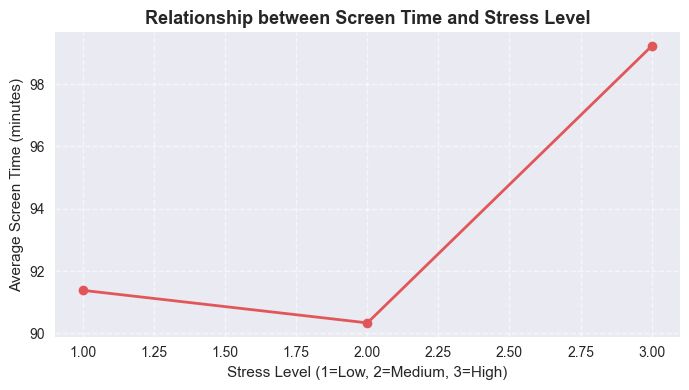

In [114]:
#  1: Line Plot
#Simple line plot showing the relationship between screen time and stress level.

# Convert stress level categories to numeric values (Low=1, Medium=2, High=3)
level_map = {"Low": 1, "Medium": 2, "High": 3}
df["stress_level_num"] = df["stress_level"].map(level_map)

# Group by stress level and calculate the average screen time
avg_stress = df.groupby("stress_level_num")["screen_time_min"].mean().reset_index()

# Create the line plot
plt.figure(figsize=(7,4))
plt.plot(avg_stress["stress_level_num"], avg_stress["screen_time_min"], 
         marker='o', color="#E15759", linewidth=2)

# Add title and labels
plt.title("Relationship between Screen Time and Stress Level", fontsize=13, fontweight='bold')
plt.xlabel("Stress Level (1=Low, 2=Medium, 3=High)")
plt.ylabel("Average Screen Time (minutes)")

# Add a light grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

In [115]:
print("""
                    Line Plot:
The higher the stress level, the higher the time to use the screen.

This may indicate that people with high stress tend to spend more time in front of screens,
perhaps as a means of entertainment or escape from stress
""")


                    Line Plot:
The higher the stress level, the higher the time to use the screen.

This may indicate that people with high stress tend to spend more time in front of screens,
perhaps as a means of entertainment or escape from stress



<Figure size 900x500 with 0 Axes>

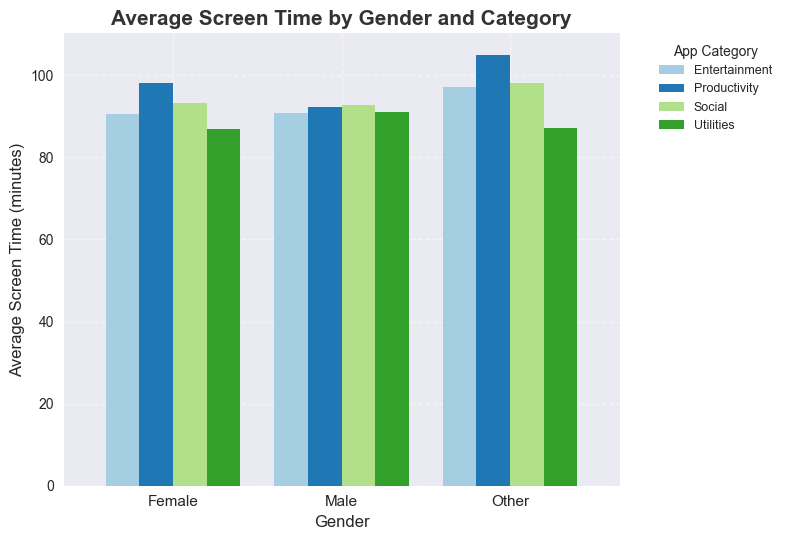

In [116]:
#  2: Bar Chart

# Calculate the average screen time per app category for each gender
avg_screen = df.groupby(["gender", "category"])["screen_time_min"].mean().unstack()

# Create the bar chart
plt.figure(figsize=(9,5))
avg_screen.plot(kind='bar', color=plt.cm.Paired.colors, width=0.8)

# Add title and axis labels
plt.title("Average Screen Time by Gender and Category", fontsize=15, fontweight='bold', color="#333333")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Screen Time (minutes)", fontsize=12)

# Rotate x-axis labels and improve readability
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=10)

# Add grid lines for better visual guidance
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend and position it outside the chart for clarity
plt.legend(title="App Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()

In [117]:
print("""
                    Bar Chart:
•	 Usage is relatively high across all categories regardless of gender.

•	 Productive and entertainment apps capture the largest percentage of screen time.

•	 The differences between males and females are slight, but the “Other” category shows the highest overall average
""")


                    Bar Chart:
•	 Usage is relatively high across all categories regardless of gender.

•	 Productive and entertainment apps capture the largest percentage of screen time.

•	 The differences between males and females are slight, but the “Other” category shows the highest overall average



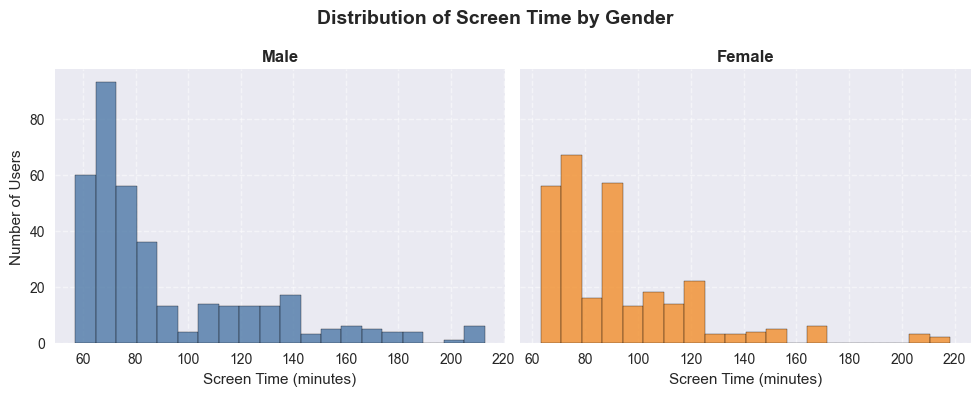

In [118]:
# 3: Histogram

# Split the figure into two histograms side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

# Male
axes[0].hist(df[df["gender"]=="Male"]["screen_time_min"], bins=20, color="#4E79A7", alpha=0.8, edgecolor='black')
axes[0].set_title("Male", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Screen Time (minutes)")
axes[0].set_ylabel("Number of Users")
axes[0].grid(True, linestyle='--', alpha=0.5)

# Female
axes[1].hist(df[df["gender"]=="Female"]["screen_time_min"], bins=20, color="#F28E2B", alpha=0.8, edgecolor='black')
axes[1].set_title("Female", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Screen Time (minutes)")
axes[1].grid(True, linestyle='--', alpha=0.5)

# General title
fig.suptitle("Distribution of Screen Time by Gender", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [119]:
print("""
                    Histogram:
Distribution shows that most users spend moderate time in front of screens, but males tend
to use the screen for slightly longer periods compared to females.

This may be related to different use activities between the sexes, 
such as games or entertainment versus social or educational applications.
""")


                    Histogram:
Distribution shows that most users spend moderate time in front of screens, but males tend
to use the screen for slightly longer periods compared to females.

This may be related to different use activities between the sexes, 
such as games or entertainment versus social or educational applications.



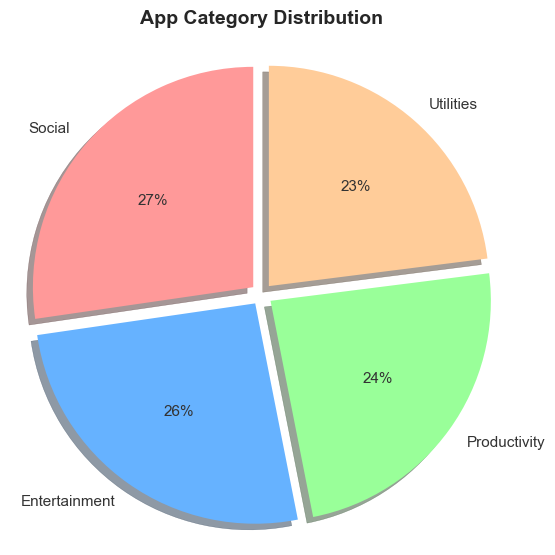

In [120]:
# 4. Pie chart – category distribution
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C2C2F0", "#FFD580"]
# count how many apps in each category
category_counts = df["category"].value_counts()

plt.figure(figsize=(6.5, 6.5))

plt.pie(
    category_counts,
    labels=category_counts.index,               # category names
    autopct="%1.0f%%",                          # show percent
    startangle=90,                              # start from top for symmetry
    colors=colors[:len(category_counts)],       # use only needed colors
    shadow=True,                                # light shadow
    explode=[0.05] * len(category_counts),      # small gap for all slices
    textprops={"fontsize": 11, "color": "#333"} # readable labels
)

plt.title("App Category Distribution", fontsize=14, fontweight="bold", pad=15)
plt.axis("equal")
plt.show()

In [121]:
print("""
                    Pie chart:
· Balance: The distribution is largely balanced, with all percentages ranging from 23% to 27%. 
This suggests that the application market (in this data) is diverse and does not depend on a single type.

· Equal attention: There seems to be a close demand from users for social media applications, entertainment, productivity and assistance.
""")


                    Pie chart:
· Balance: The distribution is largely balanced, with all percentages ranging from 23% to 27%. 
This suggests that the application market (in this data) is diverse and does not depend on a single type.

· Equal attention: There seems to be a close demand from users for social media applications, entertainment, productivity and assistance.



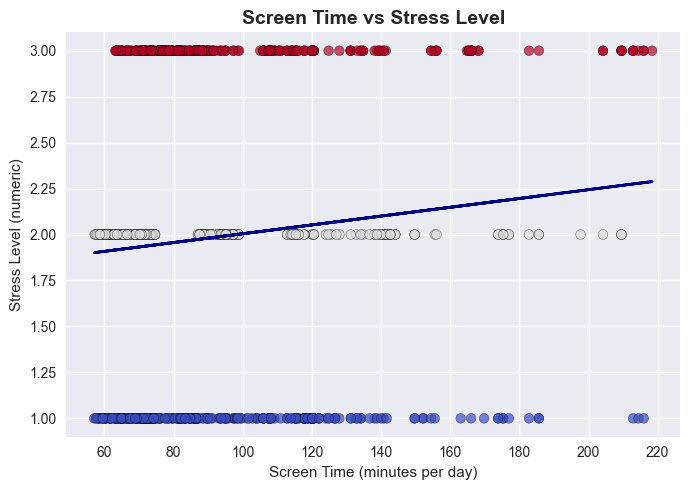

In [122]:
# 5: Scatter Plot
# Users with higher screen time tend to report higher stress levels.

x = df['screen_time_min']       # وقت استخدام الهاتف/التطبيق بالدقائق
y = df['stress_level_num']      # مستوى التوتر كقيمة رقمية

plt.figure(figsize=(7,5))
plt.scatter(x, y, c=y, cmap='coolwarm', edgecolor='black', alpha=0.7)

# خط الانحدار
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='navy', linewidth=2)

plt.title("Screen Time vs Stress Level", fontsize=14, fontweight='bold')
plt.xlabel("Screen Time (minutes per day)")
plt.ylabel("Stress Level (numeric)")
plt.tight_layout()
plt.show()

In [123]:
print("""
                    Scatter Plot:
· The relationship is clear: the data strongly indicates that long use of the phone is associated with higher levels of stress.

· Not a certain reason: It is important to remember that this drawing shows a Correlation and not necessarily a Causation relationship. 
This means that we can't be sure that using the phone causes stress directly.
It is possible that people who suffer from stress tend to use their phones more.
""")


                    Scatter Plot:
· The relationship is clear: the data strongly indicates that long use of the phone is associated with higher levels of stress.

· Not a certain reason: It is important to remember that this drawing shows a Correlation and not necessarily a Causation relationship. 
This means that we can't be sure that using the phone causes stress directly.
It is possible that people who suffer from stress tend to use their phones more.



<Figure size 600x500 with 0 Axes>

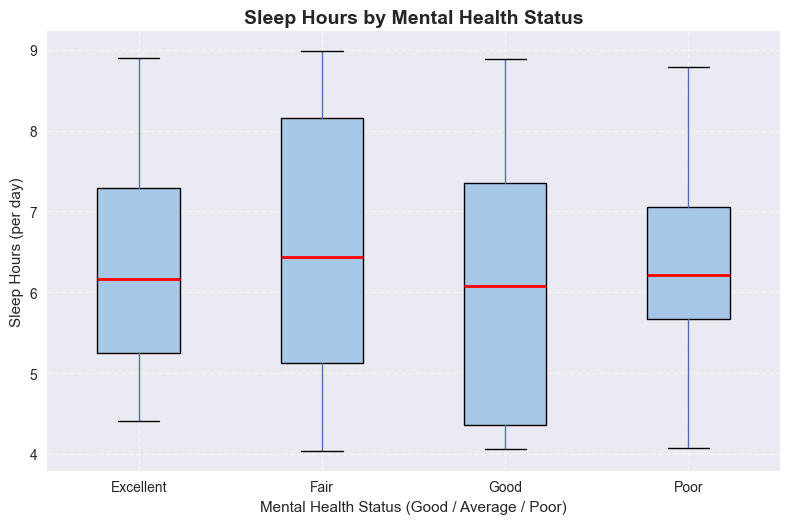

In [124]:
# 6 Box plot: compare sleep hours across mental health status
plt.figure(figsize=(6,5))
df.boxplot(
    column="sleep_hours",             
    by="mental_health_status",         
    patch_artist=True,
    boxprops=dict(facecolor="#A7C7E7", color="black"),
    medianprops=dict(color="red", linewidth=2)
)

plt.title("Sleep Hours by Mental Health Status", fontsize=14, fontweight='bold')
plt.suptitle("")  # remove pandas default title
plt.xlabel("Mental Health Status (Good / Average / Poor)", fontsize=11)
plt.ylabel("Sleep Hours (per day)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [125]:
print("""
                    Box plot:
Strong positive relationship: There is a clear positive relationship between the quality of mental health and the number of hours of sleep

Consistency in patterns: People with better mental health tend to sleep more hours and more regularly

· Important indicator: Decreased sleep hours can be an indication of mental health challenges
""")


                    Box plot:
Strong positive relationship: There is a clear positive relationship between the quality of mental health and the number of hours of sleep

Consistency in patterns: People with better mental health tend to sleep more hours and more regularly

· Important indicator: Decreased sleep hours can be an indication of mental health challenges



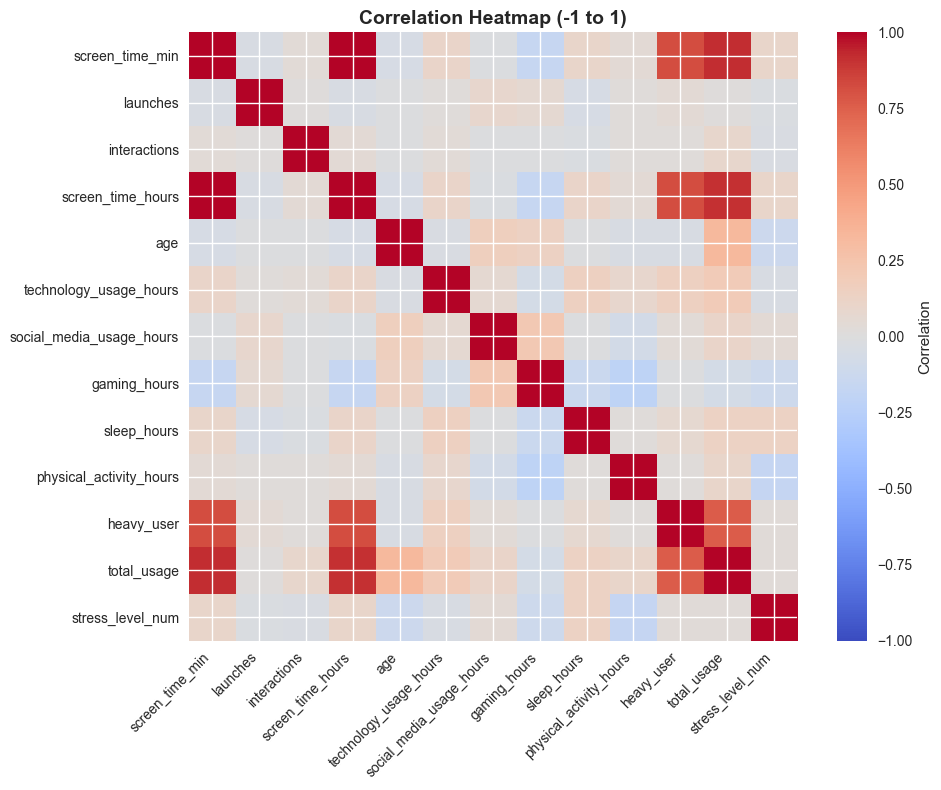

In [126]:
#  7 Correlation Heatmap
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Correlation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap (-1 to 1)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [127]:
print("""
                     Correlation Heatmap:
Cohesive digital lifestyle: there are groups of variables • move together (digital activity, health, stress)

Health and digital habits: clear relationships appear between 

Digital habits and health indicators

Meaningful data: strong correlations in places 

Expected indicates the quality of the data
""")


                     Correlation Heatmap:
Cohesive digital lifestyle: there are groups of variables • move together (digital activity, health, stress)

Health and digital habits: clear relationships appear between 

Digital habits and health indicators

Meaningful data: strong correlations in places 

Expected indicates the quality of the data



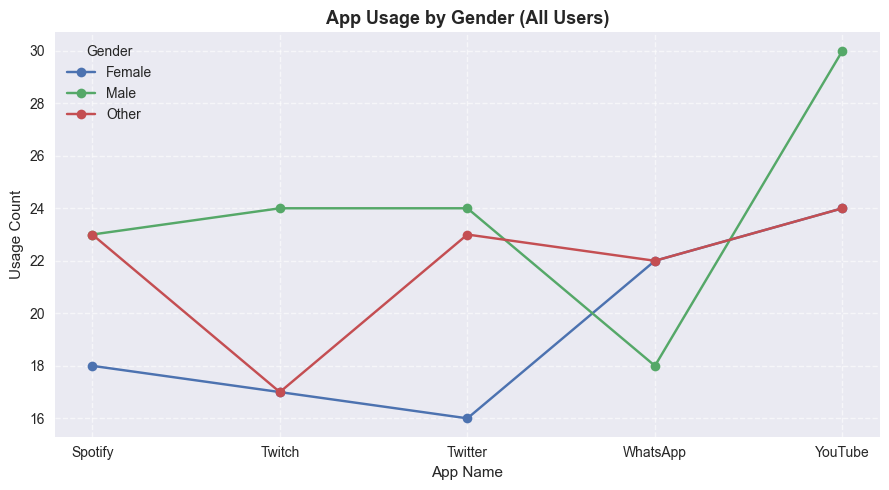

In [128]:
gender_app = df.groupby(["gender", "app_name"]).size().reset_index(name="usage_count")
# نختار أكثر 5 تطبيقات استخدامًا فقط لسهولة العرض
top_apps = gender_app.groupby("app_name")["usage_count"].sum().nlargest(5).index
gender_app = gender_app[gender_app["app_name"].isin(top_apps)]

plt.figure(figsize=(9,5))
for g in gender_app["gender"].unique():
    subset = gender_app[gender_app["gender"] == g]
    plt.plot(subset["app_name"], subset["usage_count"], marker='o', label=g)

plt.title("App Usage by Gender (All Users)", fontsize=13, fontweight='bold')
plt.xlabel("App Name")
plt.ylabel("Usage Count")
plt.legend(title="Gender")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [129]:
print("""
· Different usage styles: each gender has special preferences in app types

· Communication apps are essential: YouTube and WhatsApp retain cross-gender popularity

· Interests Specialisation: Twitch (Gaming) Is More Attractive To Males, While Spotify (Music) Is More Attractive To Females
""")


· Different usage styles: each gender has special preferences in app types

· Communication apps are essential: YouTube and WhatsApp retain cross-gender popularity

· Interests Specialisation: Twitch (Gaming) Is More Attractive To Males, While Spotify (Music) Is More Attractive To Females



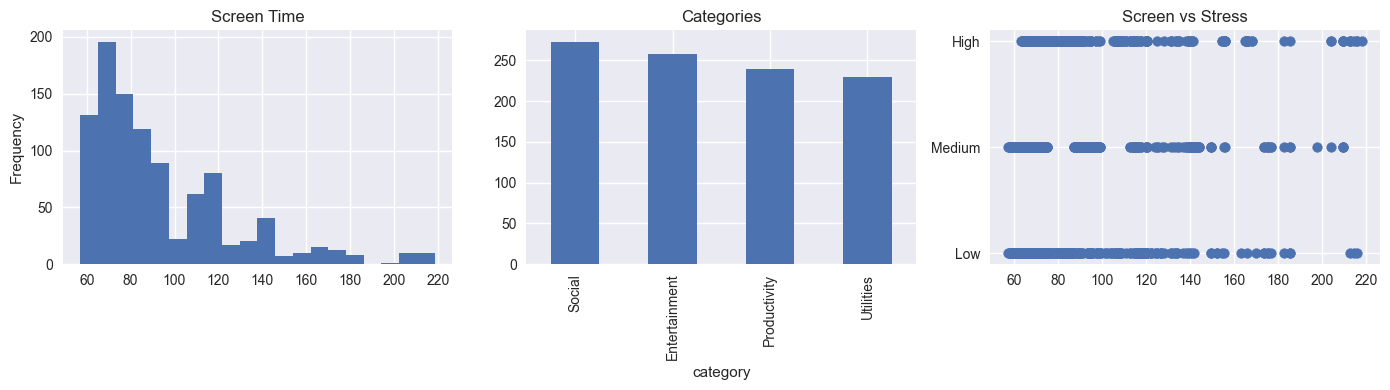

In [130]:
# Creates three plots side by side:
# 1) Histogram of screen time
# 2) Bar chart of category counts
# 3) Scatter plot showing relationship between screen time and stress level

fig, axs = plt.subplots(1, 3, figsize=(14,4))

df['screen_time_min'].plot(kind='hist', bins=20, ax=axs[0], title='Screen Time')
df['category'].value_counts().plot(kind='bar', ax=axs[1], title='Categories')
axs[2].scatter(df['screen_time_min'], df['stress_level'])
axs[2].set_title('Screen vs Stress')

plt.tight_layout()
plt.show()

In [131]:
print("""
Based on the image, the following three parts show an analysis of data about Screen Time and Stress Levels:

Chart on the left (Histogram): represents the distribution of screen time. The data shows that most individuals have a screen time of between 60 and 100 minutes, with fewer individuals spending more time.

Bar Chart: Represents The Number Of Times Each Application Category Appears. The data show that the “Social” and “Entertainment” categories are the most commonly used, followed by the “Productivity” and “Utilities” categories similarly.

Chart on the right (Scatter Plot): represents the relationship between screen time and stress level. Pooled points indicate that stress levels are categorised into separate categories (high, medium, low), and there seem to be people with high, medium, 
or low stress levels regardless of their screen time.
""")


Based on the image, the following three parts show an analysis of data about Screen Time and Stress Levels:

Chart on the left (Histogram): represents the distribution of screen time. The data shows that most individuals have a screen time of between 60 and 100 minutes, with fewer individuals spending more time.

Bar Chart: Represents The Number Of Times Each Application Category Appears. The data show that the “Social” and “Entertainment” categories are the most commonly used, followed by the “Productivity” and “Utilities” categories similarly.

Chart on the right (Scatter Plot): represents the relationship between screen time and stress level. Pooled points indicate that stress levels are categorised into separate categories (high, medium, low), and there seem to be people with high, medium, 
or low stress levels regardless of their screen time.



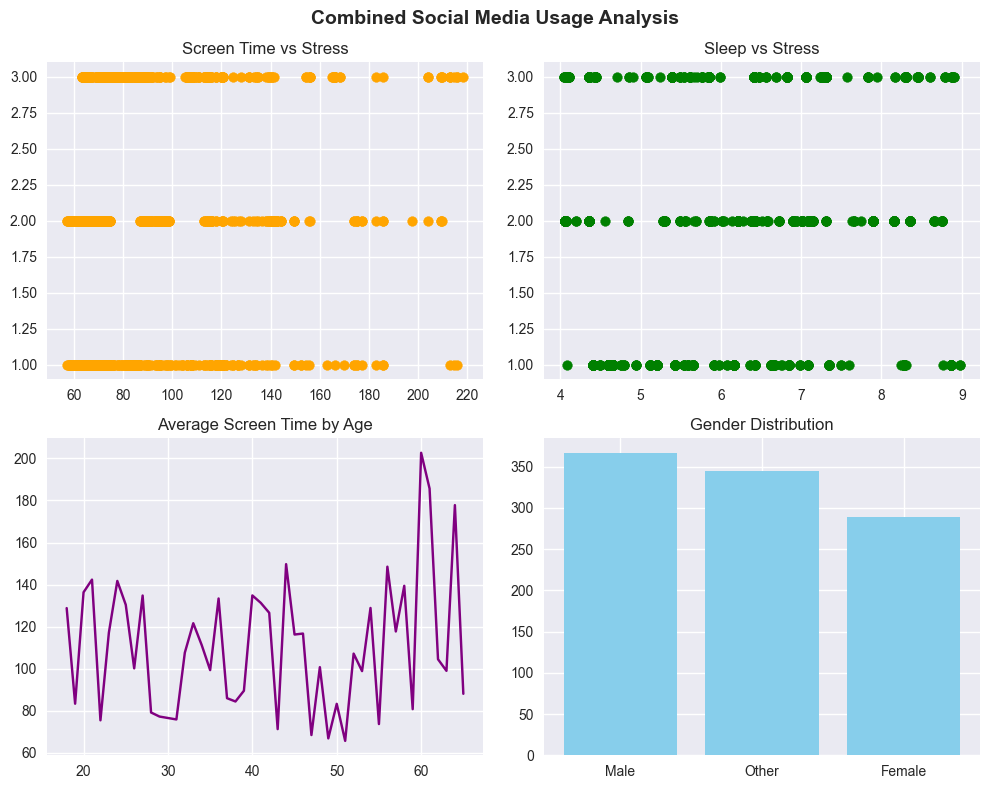

In [132]:

fig, axes = plt.subplots(2, 2, figsize=(10,8))

axes[0,0].scatter(df['screen_time_min'], df['stress_level_num'], color='orange')
axes[0,0].set_title("Screen Time vs Stress")

axes[0,1].scatter(df['sleep_hours'], df['stress_level_num'], color='green')
axes[0,1].set_title("Sleep vs Stress")

axes[1,0].plot(df.groupby('age')['screen_time_min'].mean(), color='purple')
axes[1,0].set_title("Average Screen Time by Age")

axes[1,1].bar(df['gender'].value_counts().index, df['gender'].value_counts().values, color='skyblue')
axes[1,1].set_title("Gender Distribution")

fig.suptitle("Combined Social Media Usage Analysis", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [133]:
print("""
General analysis:

Charts examine the relationship between social media use and certain factors such as stress, sleep, and age. Four different graphs were created to showcase these relationships.

---

1. Screen time vs. Stress Level:

· Relationship: There is an inverse correlation between screen time and stress level.

Explanation: People who spend more time on the screen seem to be tempted to report lower stress levels. It may be due to the use of social media for entertainment or escape from stress.

---

2. Average Screen Time By Age:

Observation: There is a difference in the average screen time across age groups.

Explanation: Some age groups (perhaps teenagers or young people) seem to spend more time on screen than older people.

---

3. Sleep vs. Stress:

Relationship: There is a direct correlation between sleep hours and stress level.

Explanation: The higher the hours of sleep, the higher the level of stress reported. This is an unexpected result and may need further study (possibly due to other factors such as anxiety or lifestyle).

---

4. Gender distribution:

Note: The sample contains:

· Females: the largest percentage.

Males: the lowest percentage.

· "Other" category: also exists but at a lower rate.

Explanation: Sex distribution may affect overall outcomes if there are differences in behaviour between the sexes
""")


General analysis:

Charts examine the relationship between social media use and certain factors such as stress, sleep, and age. Four different graphs were created to showcase these relationships.

---

1. Screen time vs. Stress Level:

· Relationship: There is an inverse correlation between screen time and stress level.

Explanation: People who spend more time on the screen seem to be tempted to report lower stress levels. It may be due to the use of social media for entertainment or escape from stress.

---

2. Average Screen Time By Age:

Observation: There is a difference in the average screen time across age groups.

Explanation: Some age groups (perhaps teenagers or young people) seem to spend more time on screen than older people.

---

3. Sleep vs. Stress:

Relationship: There is a direct correlation between sleep hours and stress level.

Explanation: The higher the hours of sleep, the higher the level of stress reported. This is an unexpected result and may need further study 

In [134]:
# Create a new column for the Digital Wellbeing Index
# Formula: (sleep_hours - social_media_usage_hours) / (stress_level_num + 1)

df["digital_wellbeing_index"] = (
    (df["sleep_hours"] - df["social_media_usage_hours"]) /
    (df["stress_level_num"] + 1)
)

# Save the updated DataFrame to the same CSV file
df.to_csv("new_merged_dataset.csv", index=False)

print("digital_wellbeing_index column created and file saved successfully!")

digital_wellbeing_index column created and file saved successfully!


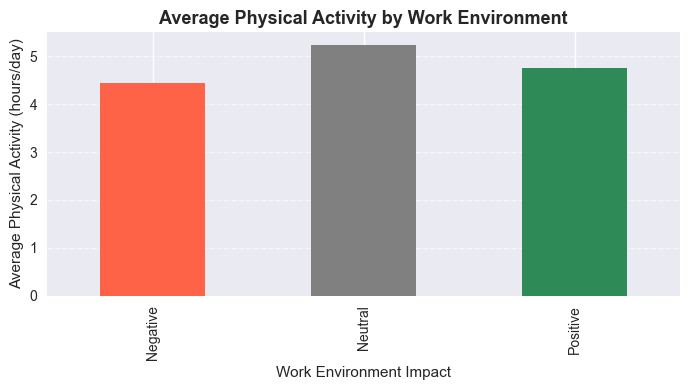

In [135]:
avg_activity = df.groupby("work_environment_impact")["physical_activity_hours"].mean()

plt.figure(figsize=(7,4))
avg_activity.plot(kind="bar", color=['tomato','gray','seagreen'])
plt.title("Average Physical Activity by Work Environment", fontsize=13, fontweight='bold')
plt.xlabel("Work Environment Impact")
plt.ylabel("Average Physical Activity (hours/day)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [71]:
print("""
         Final Insight Summary

The analysis shows that higher screen time and longer technology use 
are linked to higher stress and less sleep.

In contrast, users with a positive work environment and regular physical activity 
show better digital well-being.

Maintaining balance between technology use, rest, and activity 
is essential for a healthy lifestyle.
""")



         Final Insight Summary

The analysis shows that higher screen time and longer technology use 
are linked to higher stress and less sleep.

In contrast, users with a positive work environment and regular physical activity 
show better digital well-being.

Maintaining balance between technology use, rest, and activity 
is essential for a healthy lifestyle.

